In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import citipy
import requests
import pprint
import random
import datetime
from time import time
import numpy as np
from config import api_key

In [2]:
#Create a City Dictionary to capture Cities against a set.
#A Set of 10 Dictionaries will be created.
#Each Set will hold 100 different city names.

cityDict = {}

#Iterate for 10 times. This will create 10 Sets.
for x in range(10):
    
    def getCity():
        '''
            Generate Random Latitudes and Longitudes.
            Use citipy library to fetch the nearest city.
            The cities will be validated for uniqueness to eliminate duplicacies
        '''
        #latitude = random.random()*10.33 #City Latitude
        latitude=np.random.uniform(low=-90.000, high=90.000)
        #longitude = random.random()*200.45 #City Longitude
        longitude=np.random.uniform(low=-180.000, high=180.000)
        city = citipy.nearest_city(latitude=latitude, longitude=longitude) #Fetch the nearest city
            
        return city.city_name
    
    cityDict[x] = set([getCity() for i in range(600)]) #Populate the set and the city list.np.random.uniform(low=-90.000, high=90.000)

In [3]:
# with open('city.list.json')as json_data:
#     city_json = json.load(json_data)

In [4]:
respList = [] # Response List - Holds all the pertinent information in tupules.

for citySet,cityList in cityDict.items():
    def getResponse(index, city):
            '''
                The following resonses are returned:
                1. City
                2. Cloudliness
                3. Country
                4. Date
                5. Humidity
                6. Latitude
                7. Longitude
                8. Maximum Temperature
                9. Wind Speed
            '''
            print(f"Processing Record {index+1} of Set {citySet+1} | {city}")
            url_target = "http://api.openweathermap.org/data/2.5/weather?"
            query_url = f"{url_target}units=Imperial&appid={api_key}&q={city}"
            print(query_url)
            response = requests.get(query_url).json()
            if response['cod']!="404":
                return (city, response['clouds']['all'], response['sys']['country'], time(),
                        response['main']['humidity'], response['coord']['lat'], response['coord']['lon'],
                        response['main']['temp_max'],response['wind']['speed'] 
                       )
            else:
                return (None, 0, None, None, 0, 0, 0, 0, 0)
        
    respList.append([getResponse(index, city) for index, city in enumerate(cityList)])


Processing Record 1 of Set 1 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=te anau
Processing Record 2 of Set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hilo
Processing Record 3 of Set 1 | bustamante
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=bustamante
Processing Record 4 of Set 1 | levikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=levikha
Processing Record 5 of Set 1 | haines junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=haines junction
Processing Record 6 of Set 1 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hualmay
Processing Record 7 of Set 1 | kasane
http://api.openweathermap.org/data/2.5/weather

Processing Record 55 of Set 1 | derzhavinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=derzhavinsk
Processing Record 56 of Set 1 | el alto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=el alto
Processing Record 57 of Set 1 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ilulissat
Processing Record 58 of Set 1 | sisophon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sisophon
Processing Record 59 of Set 1 | umm kaddadah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=umm kaddadah
Processing Record 60 of Set 1 | danjiangkou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=danjiangkou
Processing Record 61 of Set 1 | hirara
http://api.openweatherm

Processing Record 110 of Set 1 | zermatt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=zermatt
Processing Record 111 of Set 1 | waw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=waw
Processing Record 112 of Set 1 | requena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=requena
Processing Record 113 of Set 1 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=torbay
Processing Record 114 of Set 1 | stafford
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=stafford
Processing Record 115 of Set 1 | demerval lobao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=demerval lobao
Processing Record 116 of Set 1 | margate
http://api.openweathermap.org/data/2.5/we

Processing Record 164 of Set 1 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kruisfontein
Processing Record 165 of Set 1 | brunsbuttel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=brunsbuttel
Processing Record 166 of Set 1 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=asau
Processing Record 167 of Set 1 | kot diji
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kot diji
Processing Record 168 of Set 1 | martapura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=martapura
Processing Record 169 of Set 1 | monte alegre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=monte alegre
Processing Record 170 of Set 1 | qaanaaq
http://api.openweat

Processing Record 217 of Set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hithadhoo
Processing Record 218 of Set 1 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=khatanga
Processing Record 219 of Set 1 | artesia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=artesia
Processing Record 220 of Set 1 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=provideniya
Processing Record 221 of Set 1 | thunder bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=thunder bay
Processing Record 222 of Set 1 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=lorengau
Processing Record 223 of Set 1 | kapaa
http://api.openweathermap

Processing Record 270 of Set 1 | bangsund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=bangsund
Processing Record 271 of Set 1 | alta floresta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=alta floresta
Processing Record 272 of Set 1 | buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=buala
Processing Record 273 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=barrow
Processing Record 274 of Set 1 | jahrom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=jahrom
Processing Record 275 of Set 1 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=beringovskiy
Processing Record 276 of Set 1 | whitley bay
http://api.openweathermap.o

Processing Record 24 of Set 2 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kahului
Processing Record 25 of Set 2 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=norman wells
Processing Record 26 of Set 2 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mataura
Processing Record 27 of Set 2 | zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=zyryanka
Processing Record 28 of Set 2 | coracora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=coracora
Processing Record 29 of Set 2 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=saskylakh
Processing Record 30 of Set 2 | ferme-neuve
http://api.openweathermap.org/da

Processing Record 78 of Set 2 | ruteng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ruteng
Processing Record 79 of Set 2 | aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=aksarka
Processing Record 80 of Set 2 | surt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=surt
Processing Record 81 of Set 2 | faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=faanui
Processing Record 82 of Set 2 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sao filipe
Processing Record 83 of Set 2 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=aklavik
Processing Record 84 of Set 2 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 133 of Set 2 | izhmorskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=izhmorskiy
Processing Record 134 of Set 2 | biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=biak
Processing Record 135 of Set 2 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=dikson
Processing Record 136 of Set 2 | guadalajara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=guadalajara
Processing Record 137 of Set 2 | tondano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tondano
Processing Record 138 of Set 2 | pedasi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=pedasi
Processing Record 139 of Set 2 | ampanihy
http://api.openweathermap.org/data/2.5/wea

Processing Record 186 of Set 2 | oum hadjer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=oum hadjer
Processing Record 187 of Set 2 | marsa matruh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=marsa matruh
Processing Record 188 of Set 2 | karaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=karaul
Processing Record 189 of Set 2 | kolokani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kolokani
Processing Record 190 of Set 2 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=vestmannaeyjar
Processing Record 191 of Set 2 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=pevek
Processing Record 192 of Set 2 | plettenberg bay
http://api.op

Processing Record 239 of Set 2 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=namibe
Processing Record 240 of Set 2 | burns lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=burns lake
Processing Record 241 of Set 2 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=saleaula
Processing Record 242 of Set 2 | marawi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=marawi
Processing Record 243 of Set 2 | treuchtlingen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=treuchtlingen
Processing Record 244 of Set 2 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cape town
Processing Record 245 of Set 2 | saint george
http://api.openweather

Processing Record 292 of Set 2 | ustka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ustka
Processing Record 293 of Set 2 | deogarh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=deogarh
Processing Record 294 of Set 2 | kharp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kharp
Processing Record 295 of Set 2 | parintins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=parintins
Processing Record 296 of Set 2 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=arraial do cabo
Processing Record 297 of Set 2 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tilichiki
Processing Record 298 of Set 2 | ancud
http://api.openweathermap.org/dat

Processing Record 44 of Set 3 | raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=raudeberg
Processing Record 45 of Set 3 | roebourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=roebourne
Processing Record 46 of Set 3 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sentyabrskiy
Processing Record 47 of Set 3 | port said
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=port said
Processing Record 48 of Set 3 | vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=vila franca do campo
Processing Record 49 of Set 3 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=pangnirtung
Processing Record 50 of Set 3 | bilibi

Processing Record 98 of Set 3 | hearst
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hearst
Processing Record 99 of Set 3 | lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=lincoln
Processing Record 100 of Set 3 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tazovskiy
Processing Record 101 of Set 3 | kaimganj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kaimganj
Processing Record 102 of Set 3 | aripuana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=aripuana
Processing Record 103 of Set 3 | pereslavl-zalesskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=pereslavl-zalesskiy
Processing Record 104 of Set 3 | talaja
http://api.openweath

Processing Record 152 of Set 3 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cherskiy
Processing Record 153 of Set 3 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kruisfontein
Processing Record 154 of Set 3 | tigil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tigil
Processing Record 155 of Set 3 | camocim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=camocim
Processing Record 156 of Set 3 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=qaanaaq
Processing Record 157 of Set 3 | lieksa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=lieksa
Processing Record 158 of Set 3 | mehamn
http://api.openweathermap.org/data/2.5/wea

Processing Record 205 of Set 3 | devils lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=devils lake
Processing Record 206 of Set 3 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=port lincoln
Processing Record 207 of Set 3 | zhongshu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=zhongshu
Processing Record 208 of Set 3 | ahipara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ahipara
Processing Record 209 of Set 3 | port-gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=port-gentil
Processing Record 210 of Set 3 | mina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mina
Processing Record 211 of Set 3 | ust-karsk
http://api.openweatherm

Processing Record 259 of Set 3 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hamilton
Processing Record 260 of Set 3 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tasiilaq
Processing Record 261 of Set 3 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=new norfolk
Processing Record 262 of Set 3 | mongagua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mongagua
Processing Record 263 of Set 3 | tommot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tommot
Processing Record 264 of Set 3 | ambon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ambon
Processing Record 265 of Set 3 | chokurdakh
http://api.openweathermap.org/data/2

Processing Record 9 of Set 4 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=marcona
Processing Record 10 of Set 4 | orange cove
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=orange cove
Processing Record 11 of Set 4 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=gat
Processing Record 12 of Set 4 | dianopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=dianopolis
Processing Record 13 of Set 4 | namikupa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=namikupa
Processing Record 14 of Set 4 | louisbourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=louisbourg
Processing Record 15 of Set 4 | port elizabeth
http://api.openweathermap.org/data

Processing Record 64 of Set 4 | khatanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=khatanga
Processing Record 65 of Set 4 | loa janan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=loa janan
Processing Record 66 of Set 4 | kota bahru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kota bahru
Processing Record 67 of Set 4 | cabras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cabras
Processing Record 68 of Set 4 | gorontalo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=gorontalo
Processing Record 69 of Set 4 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=nanortalik
Processing Record 70 of Set 4 | saldanha
http://api.openweathermap.org/dat

Processing Record 118 of Set 4 | dhola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=dhola
Processing Record 119 of Set 4 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cherskiy
Processing Record 120 of Set 4 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=meulaboh
Processing Record 121 of Set 4 | kuche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kuche
Processing Record 122 of Set 4 | najran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=najran
Processing Record 123 of Set 4 | lensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=lensk
Processing Record 124 of Set 4 | inhambane
http://api.openweathermap.org/data/2.5/weather?units=Im

Processing Record 171 of Set 4 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ilulissat
Processing Record 172 of Set 4 | weihe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=weihe
Processing Record 173 of Set 4 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=georgetown
Processing Record 174 of Set 4 | xuddur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=xuddur
Processing Record 175 of Set 4 | doka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=doka
Processing Record 176 of Set 4 | son la
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=son la
Processing Record 177 of Set 4 | east london
http://api.openweathermap.org/data/2.5/weather?

Processing Record 225 of Set 4 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=fairbanks
Processing Record 226 of Set 4 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=coquimbo
Processing Record 227 of Set 4 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=port alfred
Processing Record 228 of Set 4 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=provideniya
Processing Record 229 of Set 4 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kapaa
Processing Record 230 of Set 4 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=esperance
Processing Record 231 of Set 4 | okhotsk
http://api.openweathermap

Processing Record 279 of Set 4 | fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=fare
Processing Record 280 of Set 4 | la tuque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=la tuque
Processing Record 281 of Set 4 | chagda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=chagda
Processing Record 282 of Set 4 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=katsuura
Processing Record 283 of Set 4 | sergeyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sergeyevka
Processing Record 284 of Set 4 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cabo san lucas
Processing Record 285 of Set 4 | illoqqortoormiut
http://api.openweather

Processing Record 3 of Set 5 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cabedelo
Processing Record 4 of Set 5 | antalya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=antalya
Processing Record 5 of Set 5 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sao joao da barra
Processing Record 6 of Set 5 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=norman wells
Processing Record 7 of Set 5 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mataura
Processing Record 8 of Set 5 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=saskylakh
Processing Record 9 of Set 5 | fallon
http://api.openweathermap.

Processing Record 56 of Set 5 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=belushya guba
Processing Record 57 of Set 5 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=rio gallegos
Processing Record 58 of Set 5 | concepcion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=concepcion
Processing Record 59 of Set 5 | mpika
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mpika
Processing Record 60 of Set 5 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cidreira
Processing Record 61 of Set 5 | marshall
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=marshall
Processing Record 62 of Set 5 | pevek
http://api.openweathermap.or

Processing Record 110 of Set 5 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=codrington
Processing Record 111 of Set 5 | ambilobe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ambilobe
Processing Record 112 of Set 5 | alappuzha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=alappuzha
Processing Record 113 of Set 5 | de-kastri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=de-kastri
Processing Record 114 of Set 5 | ludhiana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ludhiana
Processing Record 115 of Set 5 | jasper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=jasper
Processing Record 116 of Set 5 | san isidro
http://api.openweathermap.or

Processing Record 163 of Set 5 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mount isa
Processing Record 164 of Set 5 | bluefields
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=bluefields
Processing Record 165 of Set 5 | sterling
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sterling
Processing Record 166 of Set 5 | tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tezu
Processing Record 167 of Set 5 | bajo baudo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=bajo baudo
Processing Record 168 of Set 5 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hilo
Processing Record 169 of Set 5 | puerto carreno
http://api.openweathermap.org/data

Processing Record 217 of Set 5 | tanabe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tanabe
Processing Record 218 of Set 5 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=fairbanks
Processing Record 219 of Set 5 | constitucion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=constitucion
Processing Record 220 of Set 5 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=port alfred
Processing Record 221 of Set 5 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=provideniya
Processing Record 222 of Set 5 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kapaa
Processing Record 223 of Set 5 | petropavlovsk-kamchatskiy
http:

Processing Record 270 of Set 5 | matiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=matiri
Processing Record 271 of Set 5 | lafiagi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=lafiagi
Processing Record 272 of Set 5 | hondo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hondo
Processing Record 273 of Set 5 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cabo san lucas
Processing Record 274 of Set 5 | addi ugri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=addi ugri
Processing Record 275 of Set 5 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=illoqqortoormiut
Processing Record 276 of Set 5 | peking
http://api.openwea

Processing Record 2 of Set 6 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cabedelo
Processing Record 3 of Set 6 | tak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tak
Processing Record 4 of Set 6 | luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=luganville
Processing Record 5 of Set 6 | mwense
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mwense
Processing Record 6 of Set 6 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=norman wells
Processing Record 7 of Set 6 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mataura
Processing Record 8 of Set 6 | saskylakh
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 56 of Set 6 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=pevek
Processing Record 57 of Set 6 | christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=christchurch
Processing Record 58 of Set 6 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sorland
Processing Record 59 of Set 6 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=victoria
Processing Record 60 of Set 6 | yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=yulara
Processing Record 61 of Set 6 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hithadhoo
Processing Record 62 of Set 6 | lorengau
http://api.openweathermap.org/data/2.5/weat

Processing Record 110 of Set 6 | avera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=avera
Processing Record 111 of Set 6 | torbay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=torbay
Processing Record 112 of Set 6 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=isangel
Processing Record 113 of Set 6 | yar-sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=yar-sale
Processing Record 114 of Set 6 | luau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=luau
Processing Record 115 of Set 6 | along
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=along
Processing Record 116 of Set 6 | viligili
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 164 of Set 6 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=poum
Processing Record 165 of Set 6 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=georgetown
Processing Record 166 of Set 6 | mo i rana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mo i rana
Processing Record 167 of Set 6 | mercedes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mercedes
Processing Record 168 of Set 6 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=atuona
Processing Record 169 of Set 6 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=east london
Processing Record 170 of Set 6 | longyearbyen
http://api.openweathermap.org/

Processing Record 217 of Set 6 | saint george
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=saint george
Processing Record 218 of Set 6 | gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=gornopravdinsk
Processing Record 219 of Set 6 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=new norfolk
Processing Record 220 of Set 6 | gombe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=gombe
Processing Record 221 of Set 6 | guantanamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=guantanamo
Processing Record 222 of Set 6 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=avarua
Processing Record 223 of Set 6 | buala
http://api.openwe

Processing Record 270 of Set 6 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kavaratti
Processing Record 271 of Set 6 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=taolanaro
Processing Record 272 of Set 6 | hovd
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hovd
Processing Record 273 of Set 6 | labelle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=labelle
Processing Record 274 of Set 6 | faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=faya
Processing Record 275 of Set 6 | malwan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=malwan
Processing Record 276 of Set 6 | kem
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 15 of Set 7 | tabiauea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tabiauea
Processing Record 16 of Set 7 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=praia da vitoria
Processing Record 17 of Set 7 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hasaki
Processing Record 18 of Set 7 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mys shmidta
Processing Record 19 of Set 7 | marand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=marand
Processing Record 20 of Set 7 | cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cururupu
Processing Record 21 of Set 7 | vao
http://api.openweathermap.org/da

Processing Record 69 of Set 7 | stralsund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=stralsund
Processing Record 70 of Set 7 | half moon bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=half moon bay
Processing Record 71 of Set 7 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=attawapiskat
Processing Record 72 of Set 7 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=amderma
Processing Record 73 of Set 7 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=nikolskoye
Processing Record 74 of Set 7 | salalah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=salalah
Processing Record 75 of Set 7 | wuwei
http://api.openweatherma

Processing Record 123 of Set 7 | sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sibolga
Processing Record 124 of Set 7 | margate
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=margate
Processing Record 125 of Set 7 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=punta arenas
Processing Record 126 of Set 7 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cabo san lucas
Processing Record 127 of Set 7 | simiti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=simiti
Processing Record 128 of Set 7 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=illoqqortoormiut
Processing Record 129 of Set 7 | uruzgan
http://

Processing Record 176 of Set 7 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=bolungarvik
Processing Record 177 of Set 7 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=taolanaro
Processing Record 178 of Set 7 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hermanus
Processing Record 179 of Set 7 | rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=rio gallegos
Processing Record 180 of Set 7 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=castro
Processing Record 181 of Set 7 | sug-aksy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sug-aksy
Processing Record 182 of Set 7 | lompoc
http://api.openweatherma

Processing Record 230 of Set 7 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kapaa
Processing Record 231 of Set 7 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=yellowknife
Processing Record 232 of Set 7 | russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=russell
Processing Record 233 of Set 7 | katangli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=katangli
Processing Record 234 of Set 7 | esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=esperance
Processing Record 235 of Set 7 | mmabatho
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mmabatho
Processing Record 236 of Set 7 | pacific grove
http://api.openweathermap.org

Processing Record 283 of Set 7 | san patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=san patricio
Processing Record 284 of Set 7 | ayan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ayan
Processing Record 285 of Set 7 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mount isa
Processing Record 286 of Set 7 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=rikitea
Processing Record 287 of Set 7 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=bambous virieux
Processing Record 288 of Set 7 | tezu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tezu
Processing Record 289 of Set 7 | leningradskiy
http://api.openweatherm

Processing Record 36 of Set 8 | port augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=port augusta
Processing Record 37 of Set 8 | college
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=college
Processing Record 38 of Set 8 | chikwawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=chikwawa
Processing Record 39 of Set 8 | waipawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=waipawa
Processing Record 40 of Set 8 | nova borova
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=nova borova
Processing Record 41 of Set 8 | biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=biak
Processing Record 42 of Set 8 | barawe
http://api.openweathermap.org/data/2.5/we

Processing Record 90 of Set 8 | yugorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=yugorsk
Processing Record 91 of Set 8 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mount gambier
Processing Record 92 of Set 8 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=iqaluit
Processing Record 93 of Set 8 | koson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=koson
Processing Record 94 of Set 8 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=thompson
Processing Record 95 of Set 8 | san pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=san pedro
Processing Record 96 of Set 8 | strezhevoy
http://api.openweathermap.org/data/2.

Processing Record 143 of Set 8 | marmande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=marmande
Processing Record 144 of Set 8 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=paamiut
Processing Record 145 of Set 8 | bosanski novi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=bosanski novi
Processing Record 146 of Set 8 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=itarema
Processing Record 147 of Set 8 | khartoum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=khartoum
Processing Record 148 of Set 8 | makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=makakilo city
Processing Record 149 of Set 8 | morbegno
http://api.openwea

Processing Record 197 of Set 8 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=clyde river
Processing Record 198 of Set 8 | veraval
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=veraval
Processing Record 199 of Set 8 | vrangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=vrangel
Processing Record 200 of Set 8 | diu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=diu
Processing Record 201 of Set 8 | evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=evensk
Processing Record 202 of Set 8 | boyolangu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=boyolangu
Processing Record 203 of Set 8 | hermanus
http://api.openweathermap.org/data/2.5/weath

Processing Record 251 of Set 8 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=bluff
Processing Record 252 of Set 8 | te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=te anau
Processing Record 253 of Set 8 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=grand gaube
Processing Record 254 of Set 8 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tuktoyaktuk
Processing Record 255 of Set 8 | ambodifototra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ambodifototra
Processing Record 256 of Set 8 | severnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=severnyy
Processing Record 257 of Set 8 | hasaki
http://api.openweather

Processing Record 305 of Set 8 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=qaqortoq
Processing Record 306 of Set 8 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=puerto ayora
Processing Record 307 of Set 8 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=narsaq
Processing Record 308 of Set 8 | prince rupert
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=prince rupert
Processing Record 309 of Set 8 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=butaritari
Processing Record 310 of Set 8 | mikhaylov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mikhaylov
Processing Record 311 of Set 8 | hualmay
http://api.open

Processing Record 31 of Set 9 | maragogi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=maragogi
Processing Record 32 of Set 9 | aklavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=aklavik
Processing Record 33 of Set 9 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=guerrero negro
Processing Record 34 of Set 9 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=vaini
Processing Record 35 of Set 9 | teya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=teya
Processing Record 36 of Set 9 | sao jose da coroa grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sao jose da coroa grande
Processing Record 37 of Set 9 | porto santo
http://api

Processing Record 85 of Set 9 | nokaneng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=nokaneng
Processing Record 86 of Set 9 | huilong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=huilong
Processing Record 87 of Set 9 | rio grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=rio grande
Processing Record 88 of Set 9 | rawson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=rawson
Processing Record 89 of Set 9 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kahului
Processing Record 90 of Set 9 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=san cristobal
Processing Record 91 of Set 9 | mana
http://api.openweathermap.org/data/2.5/

Processing Record 139 of Set 9 | north bend
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=north bend
Processing Record 140 of Set 9 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=palabuhanratu
Processing Record 141 of Set 9 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=upernavik
Processing Record 142 of Set 9 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=port hardy
Processing Record 143 of Set 9 | marsaxlokk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=marsaxlokk
Processing Record 144 of Set 9 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mount isa
Processing Record 145 of Set 9 | chicama
http://ap

Processing Record 193 of Set 9 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=clyde river
Processing Record 194 of Set 9 | chibombo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=chibombo
Processing Record 195 of Set 9 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hermanus
Processing Record 196 of Set 9 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=castro
Processing Record 197 of Set 9 | tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tromso
Processing Record 198 of Set 9 | ilukste
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ilukste
Processing Record 199 of Set 9 | tiarei
http://api.openweathermap.org/data/2.5/w

Processing Record 246 of Set 9 | altay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=altay
Processing Record 247 of Set 9 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sentyabrskiy
Processing Record 248 of Set 9 | pontianak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=pontianak
Processing Record 249 of Set 9 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=pangnirtung
Processing Record 250 of Set 9 | akersberga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=akersberga
Processing Record 251 of Set 9 | hirara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hirara
Processing Record 252 of Set 9 | sechura
http://api.openweathermap

Processing Record 300 of Set 9 | santo antonio da platina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=santo antonio da platina
Processing Record 301 of Set 9 | hefei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hefei
Processing Record 302 of Set 9 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=saleaula
Processing Record 303 of Set 9 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cape town
Processing Record 304 of Set 9 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=saint-joseph
Processing Record 305 of Set 9 | hamilton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hamilton
Processing Record 306 of Set 9 | baiyin


Processing Record 37 of Set 10 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tiksi
Processing Record 38 of Set 10 | pueblo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=pueblo
Processing Record 39 of Set 10 | port keats
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=port keats
Processing Record 40 of Set 10 | sangar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sangar
Processing Record 41 of Set 10 | nizhneyansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=nizhneyansk
Processing Record 42 of Set 10 | cruzeiro do oeste
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=cruzeiro do oeste
Processing Record 43 of Set 10 | qaanaaq
http://api.openweathe

Processing Record 91 of Set 10 | charleston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=charleston
Processing Record 92 of Set 10 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=nikolskoye
Processing Record 93 of Set 10 | indian head
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=indian head
Processing Record 94 of Set 10 | maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=maceio
Processing Record 95 of Set 10 | pinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=pinsk
Processing Record 96 of Set 10 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sao filipe
Processing Record 97 of Set 10 | buzmeyin
http://api.openweathermap.

Processing Record 144 of Set 10 | rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=rungata
Processing Record 145 of Set 10 | kasempa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kasempa
Processing Record 146 of Set 10 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ponta do sol
Processing Record 147 of Set 10 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hilo
Processing Record 148 of Set 10 | mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=mayumba
Processing Record 149 of Set 10 | shache
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=shache
Processing Record 150 of Set 10 | agadir
http://api.openweathermap.org/data/2.5/

Processing Record 197 of Set 10 | kyshtovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=kyshtovka
Processing Record 198 of Set 10 | dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=dunedin
Processing Record 199 of Set 10 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=hermanus
Processing Record 200 of Set 10 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=castro
Processing Record 201 of Set 10 | madaoua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=madaoua
Processing Record 202 of Set 10 | dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=dingle
Processing Record 203 of Set 10 | namatanai
http://api.openweathermap.org/data/2

Processing Record 251 of Set 10 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=sentyabrskiy
Processing Record 252 of Set 10 | aasiaat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=aasiaat
Processing Record 253 of Set 10 | campos sales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=campos sales
Processing Record 254 of Set 10 | jardim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=jardim
Processing Record 255 of Set 10 | bang saphan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=bang saphan
Processing Record 256 of Set 10 | ukiah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=ukiah
Processing Record 257 of Set 10 | balkhash
http://api.openwe

Processing Record 305 of Set 10 | pangai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=pangai
Processing Record 306 of Set 10 | zemio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=zemio
Processing Record 307 of Set 10 | maldonado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=maldonado
Processing Record 308 of Set 10 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=grindavik
Processing Record 309 of Set 10 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=rikitea
Processing Record 310 of Set 10 | tokur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=ff7a2a2e0979c990c76f0824c756ea50&q=tokur


In [5]:
cityList = []
cloudList = []
countryList = []
dateList = []
humidList = []
latList = []
lonList = []
maxTempList = []
windList = []

for respSet in range(len(respList)):
    for resp in respList[respSet]:
        cityList.append(resp[0])
        cloudList.append(resp[1])
        countryList.append(resp[2])
        dateList.append(resp[3])
        humidList.append(resp[4])
        latList.append(resp[5])
        lonList.append(resp[6])
        maxTempList.append(resp[7])
        windList.append(resp[8])    


In [6]:
weatherDict = {
    "City":cityList,
    "Cloudiness":cloudList,
    "Country":countryList,
    "Date":dateList,
    "Humidity":humidList,
    "Lat":latList,
    "Lng":lonList,
    "Max. Temp":maxTempList,
    "Wind Speed":windList
}

weatherDF = pd.DataFrame(weatherDict)

In [7]:
weatherDF = weatherDF.dropna(how='any')

In [10]:
grouped = weatherDF.groupby('City')
grouped.groups.values()
index = [gp_keys[0] for gp_keys in grouped.groups.values()]
weatherDF = weatherDF.reindex(index)
weatherDF.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max. Temp,Wind Speed
3065,aasiaat,64,GL,1.544381e+09,100,68.71,-52.87,18.46,9.84
1012,abaza,32,RU,1.544381e+09,77,52.65,90.10,-8.68,2.46
1359,abbeville,20,FR,1.544381e+09,71,50.11,1.83,50.00,19.46
1955,abha,0,SA,1.544381e+09,87,18.22,42.50,59.00,4.70
720,abrau-dyurso,0,RU,1.544381e+09,87,44.70,37.60,46.40,8.95


In [11]:
#Save the data in a CSV
weatherDF.to_csv('WeatherPy.csv')

In [12]:
#Compute today's date
today = datetime.date.today()
today = today.strftime("%m/%d/%y")

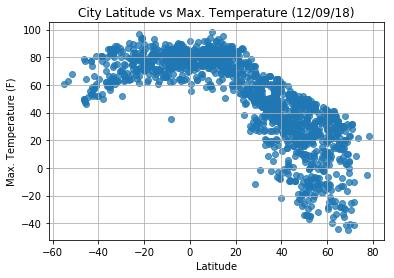

In [13]:
# Build the scatter plots for:
# Latitude vs Temperature
# y - axis : Temperature (F)
# x - axis : Latitude

plt.scatter(x=weatherDF['Lat'], y=weatherDF['Max. Temp'], alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.title(f'City Latitude vs Max. Temperature ({today})')
plt.show()

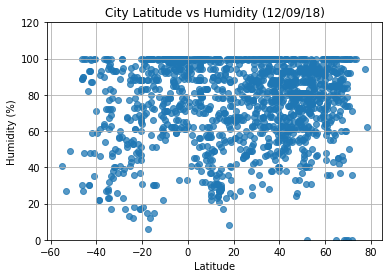

In [20]:
# Latitude vs Humidity
# y - axis : Humidity (%)
# x - axis : Latitude

plt.scatter(x=weatherDF['Lat'], y=weatherDF['Humidity'], alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 120)
plt.title(f'City Latitude vs Humidity ({today})')
plt.show()

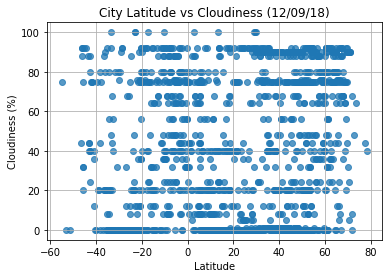

In [15]:
# Latitude vs Cloudiness
# y - axis : Cloudiness (%)
# x - axis : Latitude

plt.scatter(x=weatherDF['Lat'], y=weatherDF['Cloudiness'], alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.show()

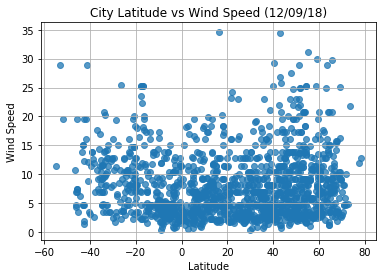

In [16]:
# Latitude vs Wind Speed
# y - axis : Wind Speed (%)
# x - axis : Latitude

plt.scatter(x=weatherDF['Lat'], y=weatherDF['Wind Speed'], alpha=0.75)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.show()